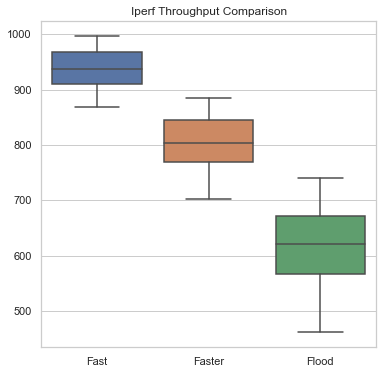

In [6]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def extract_throughput_values(filename):
    with open(filename, 'r') as file:
        content = file.read()
        regex = r'\d+\s+Mbits/sec'
        matches = re.findall(regex, content)
        throughput_values = [float(match.split()[0]) for match in matches]
        return throughput_values

throughput_1 = extract_throughput_values('with/output_fast.txt')
throughput_2 = extract_throughput_values('with/output_faster.txt')
throughput_3 = extract_throughput_values('with/output_flood.txt')
mn = min(len(throughput_1),len(throughput_2),len(throughput_3))
df = pd.DataFrame({'Fast': throughput_1[:mn],
                   'Faster': throughput_2[:mn],
                   'Flood':throughput_3[:mn],
                  })

sns.set(style='whitegrid')
plt.figure(figsize=(6, 6))
sns.boxplot(data=df)
plt.title('Iperf Throughput Comparison')
plt.savefig('iperf_comparison_boxplot3.pdf')


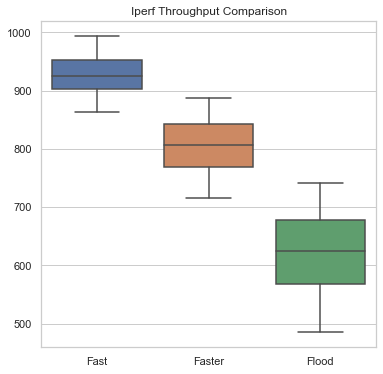

In [7]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def extract_throughput_values(filename):
    with open(filename, 'r') as file:
        content = file.read()
        regex = r'\d+\s+Mbits/sec'
        matches = re.findall(regex, content)
        throughput_values = [float(match.split()[0]) for match in matches]
        return throughput_values

throughput_1 = extract_throughput_values('without/output_fast.txt')
throughput_2 = extract_throughput_values('without/output_faster.txt')
throughput_3 = extract_throughput_values('without/output_flood.txt')
mn = min(len(throughput_1),len(throughput_2),len(throughput_3))
df = pd.DataFrame({'Fast': throughput_1[:mn],
                   'Faster': throughput_2[:mn],
                   'Flood':throughput_3[:mn],
                  })

sns.set(style='whitegrid')
plt.figure(figsize=(6, 6))
sns.boxplot(data=df)
plt.title('Iperf Throughput Comparison')
plt.savefig('iperf_comparison_boxplot3.pdf')


,Fast,Faster,Flood
0,979.0,887.0,742.0
1,973.0,869.0,729.0
2,985.0,865.0,728.0
3,968.0,871.0,714.0
4,976.0,863.0,717.0
...,...,...,...
114,875.0,726.0,508.0
115,864.0,724.0,499.0
116,869.0,716.0,498.0
117,877.0,719.0,485.0


<AxesSubplot:>

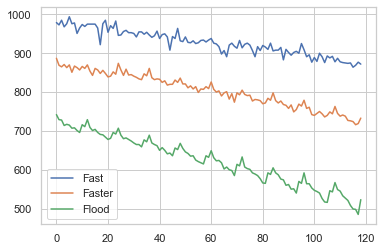

In [5]:
display(df)
df.plot()

In [ ]:
plt.hist(df["Without Microsegmentation"].values, bins=20)


In [ ]:
plt.hist(df["With Microsegmentation"].values, bins=20)

In [ ]:
# indexes_to_drop = df[df['Without Microsegmentation'] < 600].index
# df = df.drop(indexes_to_drop)

In [ ]:
# sns.set(style='whitegrid')
# plt.figure(figsize=(6, 6))
# sns.boxplot(data=df)
# plt.title('Iperf Throughput Comparison')
# plt.savefig('iperf_comparison_boxplot2.pdf')

In [ ]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def extract_throughput_values(filename):
    with open(filename, 'r') as file:
        content = file.read()
        regex = r'\d+\s+Mbits/sec'
        matches = re.findall(regex, content)
        throughput_values = [float(match.split()[0]) for match in matches]
        return throughput_values

throughput_without_microsegmentation = extract_throughput_values('without.txt')
throughput_with_microsegmentation = extract_throughput_values('with.txt')

df = pd.DataFrame({'Without Microsegmentation': throughput_without_microsegmentation,
                   'With Microsegmentation': throughput_with_microsegmentation})

sns.set(style='whitegrid')
plt.figure(figsize=(6, 6))
sns.boxplot(data=df)
plt.title('Iperf Throughput Comparison')
plt.savefig('iperf_comparison_boxplot3.pdf')


In [ ]:
display(df)
df.plot()